In [2]:
# Часть 1. Критерии согласия

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import kstest
import scipy.stats as stats
import math

In [4]:
# ПУНКТ 1 (КРИТЕРИЙ ХИ-КВАДРАТ ПИРСОНА)

In [5]:
#1.1
a=3
b=2
n=10000
s=np.random.weibull(a,n)*b
minn=min(s)
maxx=max(s)
print(s)


[2.0192992  2.56566543 1.52463722 ... 2.56619823 2.06125208 2.46767386]


Хи-квадрат наблюдаемое:  18.324523545892482


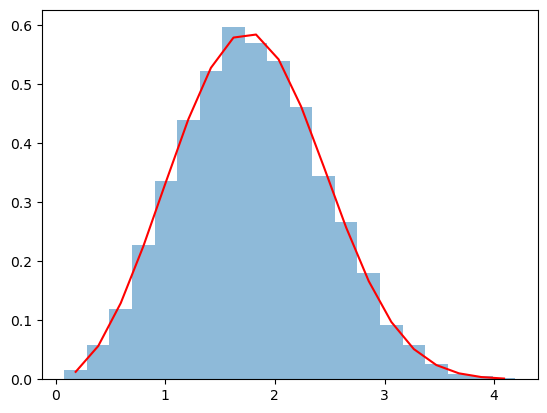

In [6]:
#1.2
s_sort=np.sort(s)

bins=20

# Эмпирические частоты
plt.hist(s, bins=bins, density=True, alpha=0.5)
observed, _ = np.histogram(s_sort,bins=bins,density=False)  # Массив частот наблюдаемой выборки

#Ожидаемые частоты
centers=[]  # средние значения X для каждого столбца
step=((maxx-minn)/bins)
for i in range(bins):
    centers.append(((minn+i*step)+(minn+(i+1)*step))/2)

pdf=weibull_min.pdf(centers,c=a,scale=b) #теоретическая функция (к)
plt.plot(centers, pdf, color='r')


Hiquare=0
for i in range(bins):
    Hiquare+=(((observed[i]-n*step*pdf[i])**2)/(n*step*pdf[i]))  # *step - нормализация 

    
print("Хи-квадрат наблюдаемое: ", Hiquare)    

In [7]:
#1.3
import scipy.stats as stats

r=bins  #к-во групп элементов
l=2  # к-во неизвестных параметров
k=r-l-1  # число степеней свободы

def Hi_2(alpha, k):
    # alpha - уровень значимости
    p=1-alpha  # доверительная вероятность
    return stats.chi2.ppf(p, k)

alpha1=0.1
alpha2=0.05
alpha3=0.01

# значение хи-квадрат с помощью обратной функции распределения
#ДЛЯ АЛЬФА=0,01
chi2_value1 = Hi_2(alpha1, k) 
print("Хи-квадрат при доверительной вероятности p=0,9: ", chi2_value1)

#ДЛЯ АЛЬФА=0,05
chi2_value2 = Hi_2(alpha2, k)
print("Хи-квадрат при доверительной вероятности p=0,95: ", chi2_value2)

#ДЛЯ АЛЬФА=0,05
chi2_value3 = Hi_2(alpha3, k)
print("Хи-квадрат при доверительной вероятности p=0,99: ", chi2_value3)

Хи-квадрат при доверительной вероятности p=0,9:  24.76903534390146
Хи-квадрат при доверительной вероятности p=0,95:  27.58711163827534
Хи-квадрат при доверительной вероятности p=0,99:  33.40866360500461


In [8]:
#1.4
if Hiquare<chi2_value1:
    print("При альфа = 0,1 подчиняется распределению Вейбулла")
else:
    print("При альфа = 0,1 не подчиняется распределению Вейбулла")
if Hiquare<chi2_value2:
    print("При альфа = 0,05 подчиняется распределению Вейбулла")
else:
    print("При альфа = 0,05 не подчиняется распределению Вейбулла")
if Hiquare<chi2_value3:
    print("При альфа = 0,01 подчиняется распределению Вейбулла")
else:
    print("При альфа = 0,01 не подчиняется распределению Вейбулла")

При альфа = 0,1 подчиняется распределению Вейбулла
При альфа = 0,05 подчиняется распределению Вейбулла
При альфа = 0,01 подчиняется распределению Вейбулла


In [9]:
# ПУНКТ 2 (КРИТЕРИЙ КОЛМОГОРОВА)

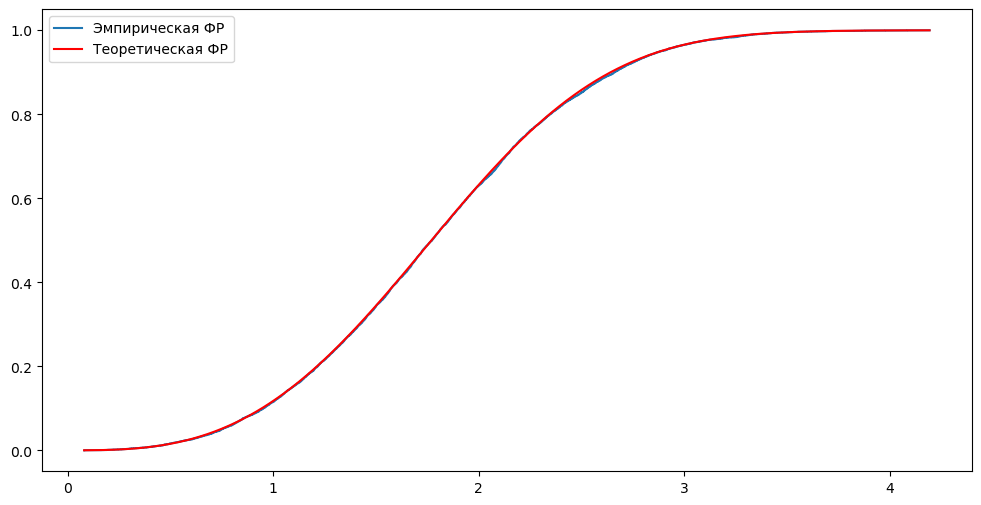

In [10]:
#2.1
def emperical_cdf(data_point, data):
    c=0
    ok=False
    for d in data:
        if d<=data_point:
            c+=1
            ok=True
        elif ok==True:
            break            
    return c/len(data)

# ЭМПИРИЧЕСКАЯ ФР
x=np.unique(s_sort)
emperical=[emperical_cdf(s_point, s_sort) for s_point in x]       
plt.figure(figsize=(12,6))
plt.step(x, emperical, label='Эмпирическая ФР')

# ТЕОРЕТИЧЕСКАЯ ФР
theoretical=weibull_min.cdf(s_sort, a, loc=0, scale=b)
plt.plot(s_sort,theoretical,'r',label='Теоретическая ФР')
plt.legend()

In [11]:
max_dif=0
for i in range(len(emperical)):
    max_dif=max(max_dif, abs(emperical[i]-theoretical[i]))

Hi2=max_dif*np.sqrt(n)      # Хи-квадрат по Колмогорову = max(Fi_эмперич-Fi_теор) * sqrt(n)
print("Хи квадрат наблюдаемое:",Hi2)
    

Хи квадрат наблюдаемое: 0.7504496993172238


In [12]:
#2.2
# ПО ТАБЛИЦЕ КОЛМОГОРОВА
# Уровень значимости 0.1: 1.22 / SQRT(n) = 1.22 / SQRT(10000) = 0.0122
# Уровень значимости 0.05: 1.36 / SQRT(n) = 1.36 / SQRT(10000) = 0.0136
# Уровень значимости 0.01: 1.63 / SQRT(n) = 1.63 / SQRT(10000) = 0.0163

# Гипотеза отвергается

In [13]:
# Часть 2. Проверка гипотезы о коэффициенте корреляции

In [14]:
X=np.random.weibull(a,n)*b
Y=np.random.weibull(a,n)*b

In [15]:
# корелляция: 
# 1 - если значения пропорциональны(высокий уровень связи)
# -1 - если значения обратно пропорциональны
# 0 - если значения не связаны
from scipy.stats import pearsonr
from scipy.stats import kendalltau

def func(x, y):
    korel, _ = pearsonr(x,y) #Расчет коэффициента корреляции Пирсона между X и Y
    print("Корелляция: ", korel)
    #Статистика Кендалла измеряет силу зависимости между двумя переменными на основе их рангов.    
    statistic, _ = kendalltau(x, y)
    print("Статистика T Кендалла: ", statistic)

In [16]:
func(X,Y)

Корелляция:  0.017280143951008513
Статистика T Кендалла:  0.010521532153215322


In [17]:
# по таблицам распределения Стьюдента

#Для уровня значимости 0.1:
#((n-1)) степень свободы: (+(-)1.645)

#Для уровня значимости 0.05:
#((n-1)) степень свободы: (+(-)1.960)

#Для уровня значимости 0.01:
#((n-1)) степень свободы: (+(-)2.576)

In [18]:
mean=0
sigma=0.001
b=np.random.normal(mean,sigma,n)
Y=2*X+b
func(X,Y)

Корелляция:  0.9999997018387493
Статистика T Кендалла:  0.9995194319431943


In [19]:
sigma=100
b=np.random.normal(mean,sigma,n)
Y=2*X+b
func(X,Y)

Корелляция:  -0.0017538230270121727
Статистика T Кендалла:  0.0007027102710271027


In [20]:
sigma=1000
b=np.random.normal(mean,sigma,n)
Y=2*X+b
func(X,Y)

Корелляция:  -0.0034889566962242845
Статистика T Кендалла:  -0.0006518251825182518
